In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
fig_size = (10, 3)
input_file = 'D://Repositories/covid-19-data/public/data/owid-covid-data.csv'
images_path = 'D://Notebooks/images/covid/'
n = 11
group_one = ['USA', 'IND']

In [3]:
inp = pd.read_csv(input_file)
inp['daily_tests'] = inp['new_tests'].rolling(7).mean()
inp['daily_cases'] = inp['new_cases'].rolling(7).mean()
inp['daily_deaths'] = inp['new_deaths'].rolling(7).mean()
inp['daily_deaths_change_1w'] = inp['daily_deaths'].pct_change(periods=6)*100
inp['daily_deaths_change_1m'] = inp['daily_deaths'].pct_change(periods=30)*100
inp['daily_cases_change_1w'] = inp['daily_cases'].pct_change(periods=6)*100
inp['daily_cases_change_1m'] = inp['daily_cases'].pct_change(periods=30)*100

inp['cfr'] = (100*inp['total_deaths'].rolling(7).sum()/inp['total_cases'].rolling(7).sum()).round(2)
inp['cfr_current'] = (100*inp['daily_deaths'].rolling(7).sum()/inp['daily_cases'].rolling(7).sum()).round(2)
inp['ptr'] = (100*inp['total_cases'].rolling(7).sum()/inp['total_tests'].rolling(7).sum()).round(2)
inp['ptr_current'] = (100*inp['daily_cases'].rolling(7).sum()/inp['daily_tests'].rolling(7).sum()).round(2)
inp['date'] = pd.to_datetime(inp['date'])
print(inp.columns)
inp[inp['iso_code'].isin(['OWID_WRL', 'USA', 'IND'])].groupby('iso_code').tail(1)[[
    'iso_code', 'date', 'total_cases', 'total_deaths', 'daily_cases', 'daily_deaths',
    'daily_deaths_change_1w', 'daily_deaths_change_1m', 'daily_cases_change_1w', 'daily_cases_change_1m',
    'cfr', 'cfr_current']]

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
     

,iso_code,date,total_cases,total_deaths,daily_cases,daily_deaths,daily_deaths_change_1w,daily_deaths_change_1m,daily_cases_change_1w,daily_cases_change_1m,cfr,cfr_current
24162,IND,2020-12-04,9608211.0,139700.0,36728.857143,500.000000,0.893629,-7.602957,-13.466594,-20.618865,1.45,1.24
57182,USA,2020-12-04,14367462.0,278932.0,182663.000000,2010.571429,39.346535,117.191358,12.098067,92.535100,1.97,0.96
59719,OWID_WRL,2020-12-04,65899441.0,1518670.0,601677.142857,10794.285714,5.955436,46.184801,3.237727,15.322871,2.32,1.76


In [4]:
top_n = inp.groupby('iso_code').tail(1).sort_values('total_cases', ascending=False).head(n)['iso_code'].tolist()
top_fifty = inp.groupby('iso_code').tail(1).sort_values('total_cases', ascending=False).head(50)['iso_code'].tolist()

In [5]:
df = inp[inp['iso_code'].isin(top_n)].groupby('iso_code').tail(1)[[
    'iso_code', 'population', 'total_cases', 'total_deaths', 'cfr', 'daily_cases_change_1w', 'daily_deaths_change_1w']]

df['cases_%_world'] = (df['total_cases']*100)/int(df[df['iso_code'] == 'OWID_WRL']['total_cases'])
df['deaths_%_world'] = (df['total_deaths']*100)/int(df[df['iso_code'] == 'OWID_WRL']['total_deaths'])
df['cases_1M_pop'] = ((df['total_cases']*1000000)/(df['population'])).astype(int)
df['deaths_1M_pop'] = ((df['total_deaths']*1000000)/(df['population'])).astype(int)

df.sort_values('cases_%_world', ascending=False).set_index('iso_code')

,population,total_cases,total_deaths,cfr,daily_cases_change_1w,daily_deaths_change_1w,cases_%_world,deaths_%_world,cases_1M_pop,deaths_1M_pop
iso_code,,,,,,,,,,
OWID_WRL,7.794799e+09,65899441.0,1518670.0,2.32,3.237727,5.955436,100.000000,100.000000,8454,194
USA,3.310026e+08,14367462.0,278932.0,1.97,12.098067,39.346535,21.802100,18.366860,43405,842
IND,1.380004e+09,9608211.0,139700.0,1.45,-13.466594,0.893629,14.580110,9.198838,6962,101
BRA,2.125594e+08,6533968.0,175964.0,2.72,24.478074,11.702128,9.915058,11.586717,30739,827
RUS,1.459345e+08,2382012.0,41730.0,1.74,5.333727,9.925788,3.614616,2.747799,16322,285
FRA,6.527351e+07,2321703.0,54859.0,2.33,-11.202668,-20.972644,3.523100,3.612306,35568,840
GBR,6.788600e+07,1694800.0,60714.0,3.59,-9.335214,-9.982384,2.571797,3.997840,24965,894
ITA,6.046183e+07,1688939.0,58852.0,3.48,-18.086315,1.430811,2.562903,3.875233,27933,973
ESP,4.675478e+07,1684647.0,46252.0,2.74,-21.040040,-22.693997,2.556390,3.045560,36031,989


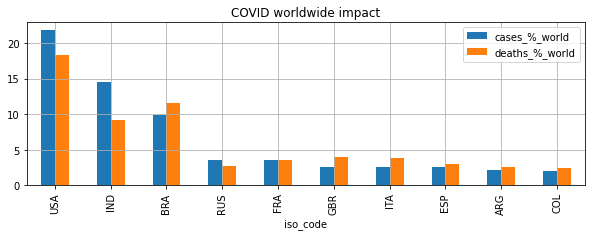

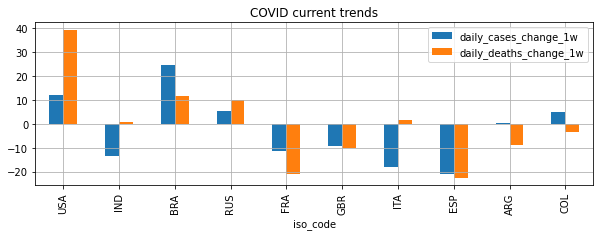

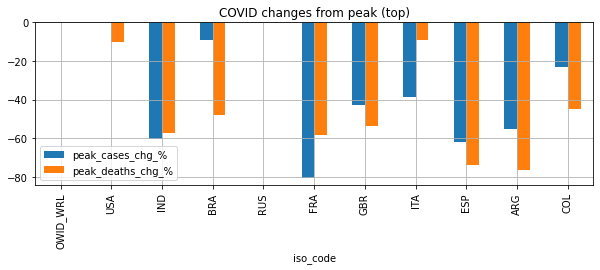

In [6]:
df[df['iso_code'] != 'OWID_WRL'].sort_values('cases_%_world', ascending=False).plot(
    x='iso_code', y=['cases_%_world', 'deaths_%_world'], kind='bar',
    figsize=fig_size, grid=True, title='COVID worldwide impact').get_figure().savefig(images_path+'worldwide.png', bbox_inches='tight')

df[df['iso_code'] != 'OWID_WRL'].sort_values('cases_%_world', ascending=False).plot(
    x='iso_code', y=['daily_cases_change_1w', 'daily_deaths_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='COVID current trends').get_figure().savefig(images_path+'trends_top.png', bbox_inches='tight')

df_max = inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code')[['daily_cases', 'daily_deaths']].max()
df_last = inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code')[['iso_code', 'daily_cases', 'daily_deaths']].tail(1).set_index('iso_code')
df_pct_chg_max = ((df_last-df_max)*100/df_max)
df_pct_chg_max['total_cases'] = inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code').tail(1).set_index('iso_code')['total_cases']
df_pct_chg_max = df_pct_chg_max.rename(columns={'daily_cases': 'peak_cases_chg_%','daily_deaths': 'peak_deaths_chg_%'})

df_pct_chg_max.sort_values(by='total_cases', ascending=False).head(n).plot(
    y=['peak_cases_chg_%', 'peak_deaths_chg_%'],
    kind='bar', figsize=fig_size, grid=True, title='COVID changes from peak (top)').get_figure().savefig(images_path+'chg_from_peak_top.png', bbox_inches='tight')

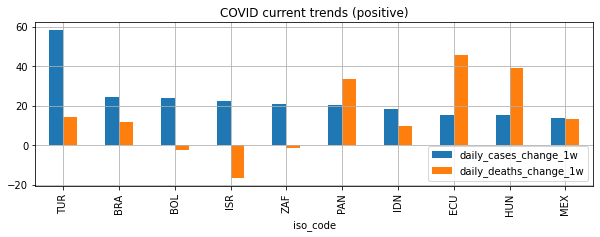

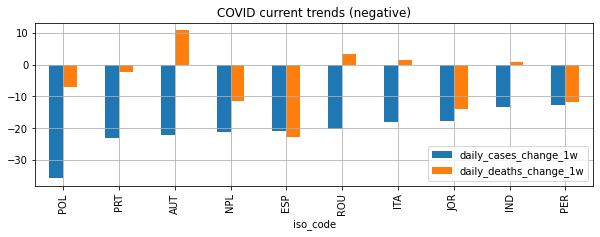

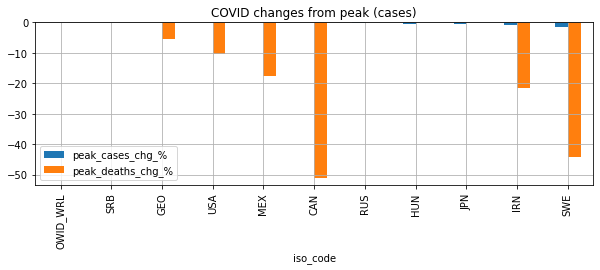

In [7]:
inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code').tail(1)[['iso_code',
                                                                  'daily_deaths_change_1w',
                                                                  'daily_cases_change_1w']].set_index('iso_code').sort_values(
    by='daily_cases_change_1w', ascending=False).head(10).plot(
    y=['daily_cases_change_1w', 'daily_deaths_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='COVID current trends (positive)').get_figure().savefig(images_path+'trends_positive.png', bbox_inches='tight')

inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code').tail(1)[['iso_code',
                                                                  'daily_deaths_change_1w',
                                                                  'daily_cases_change_1w']].set_index('iso_code').sort_values(
    by='daily_cases_change_1w', ascending=True).head(10).plot(
    y=['daily_cases_change_1w', 'daily_deaths_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='COVID current trends (negative)').get_figure().savefig(images_path+'trends_negative.png', bbox_inches='tight')

df_pct_chg_max.sort_values(by=['peak_cases_chg_%', 'peak_deaths_chg_%', 'total_cases'], ascending=[False, False, False]).head(n).plot(
    y=['peak_cases_chg_%', 'peak_deaths_chg_%'],
    kind='bar', figsize=fig_size, grid=True, title='COVID changes from peak (cases)').get_figure().savefig(images_path+'chg_from_peak_cases.png', bbox_inches='tight')

In [8]:
def plot_weekly_avg(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')][[
        'date', 'daily_cases', 'daily_deaths', 'daily_tests']].plot(
        x='date', y=['daily_cases', 'daily_deaths'], secondary_y=['daily_deaths'],
        style = ['-', '--'], figsize=fig_size, grid=True, title=country).get_figure().savefig(images_path+'daily_'+country+'.png', bbox_inches='tight')
    
def plot_cfr(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')].plot(
        x='date', y='cfr', style = ['--'], figsize=fig_size, grid=True, title=country)
    
def plot_ptr(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')].plot(
        x='date', y='ptr',
        style = ['--'], figsize=fig_size, grid=True, title=country)
    
def plot_totals(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')][[
        'date', 'total_cases', 'total_deaths']].plot(
        x='date', y=['total_cases', 'total_deaths'], secondary_y=['total_deaths'],
        style = ['-', '--'], figsize=fig_size, grid=True, title=country).get_figure().savefig(images_path+'total_'+country+'.png', bbox_inches='tight')

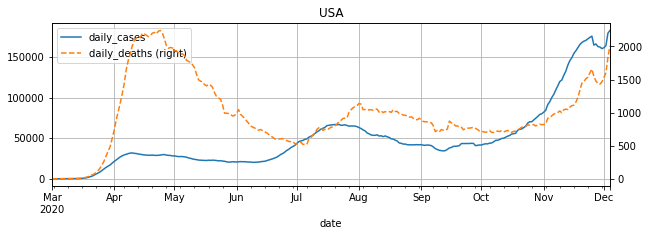

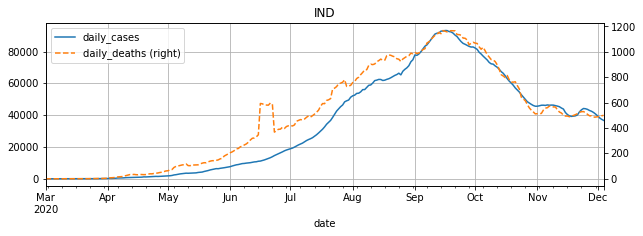

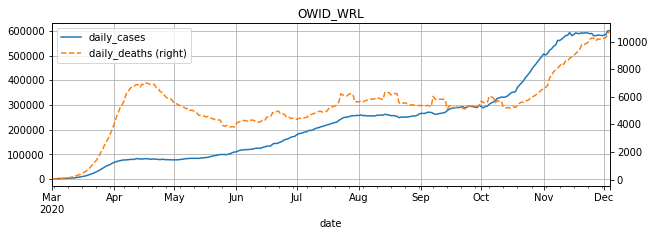

In [9]:
for country in group_one+['OWID_WRL']:
    plot_weekly_avg(inp, iso_code=country)

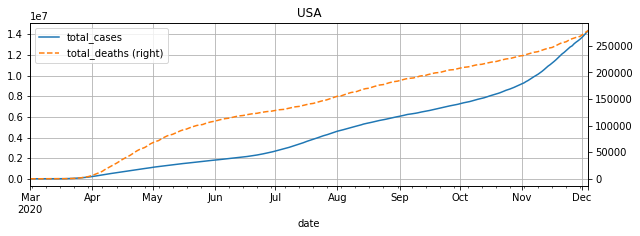

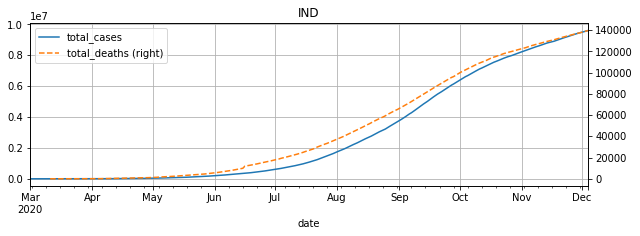

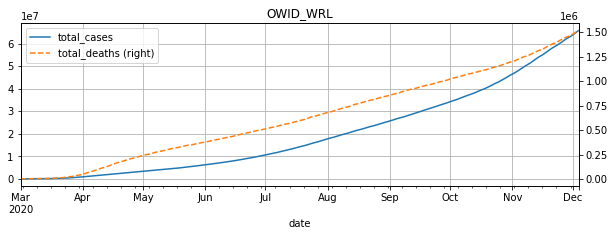

In [10]:
for country in group_one+['OWID_WRL']:
    plot_totals(inp, iso_code=country)

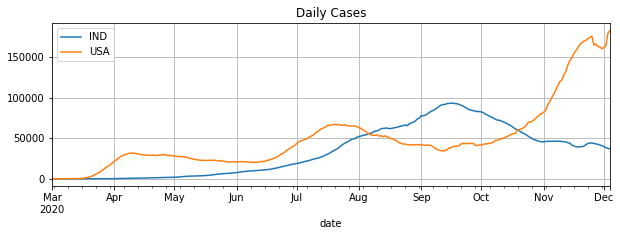

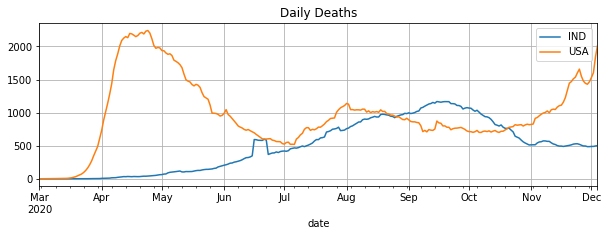

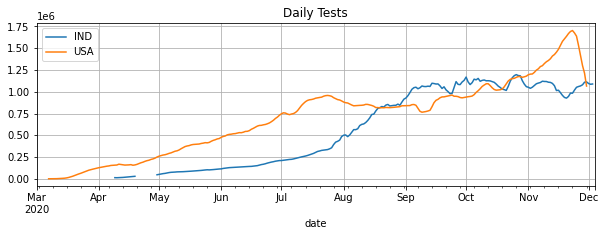

In [11]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['daily_cases'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Cases')
axes.legend(['IND', 'USA'])

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['daily_deaths'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Deaths')
axes.legend(['IND', 'USA'])

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['daily_tests'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Tests')
axes.legend(['IND', 'USA'])

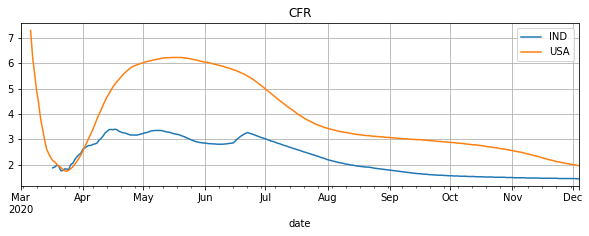

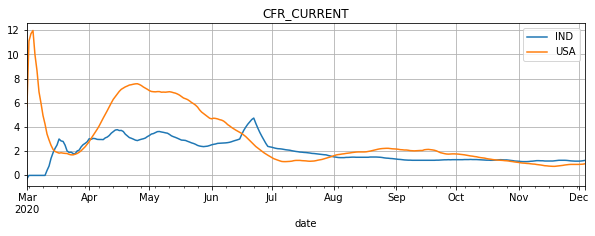

In [12]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(['USA', 'IND'])) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['cfr'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='CFR')
axes.legend(['IND', 'USA'])

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(['USA', 'IND'])) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['cfr_current'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='CFR_CURRENT')
axes.legend(['IND', 'USA'])

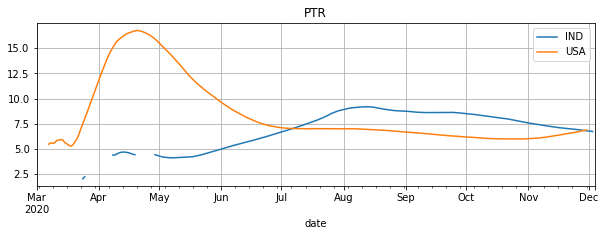

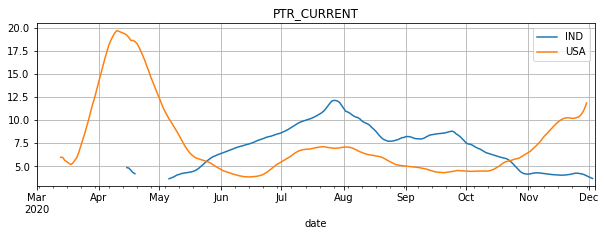

In [13]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(['USA', 'IND'])) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['ptr'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='PTR')
axes.legend(['IND', 'USA'])

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(['USA', 'IND'])) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['ptr_current'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='PTR_CURRENT')
axes.legend(['IND', 'USA'])